<a href="https://colab.research.google.com/github/ezahner/IDS/blob/main/Project4_Part1_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Erin Zahner
--

**Project 4 - Part 1 - Python**
--

In [73]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")


In [74]:
data.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,1066.581604,88.580793
std,13.678875,2.598297,7255.455373,406.322208
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000


____________________________________________________________________________________________________
Before doing any other analysis or manipulation of data, we must cleanse it of noise. Here, we can see that we need to replace the 0 values in capital-gain and capital-loss, as well as, the values of 99999 in capital-gain.
____________________________________________________________________________________________________

In [75]:
import numpy as np
#clean up 0s and 99999 by making them nan
data.replace(0, np.nan, inplace=True)
data.replace(99999, np.nan, inplace=True)


In [76]:
#replace nan values with mean
data['capital-gain'].fillna(np.nanmean(data['capital-gain']), inplace=True)
data['capital-loss'].fillna(np.nanmean(data['capital-loss']), inplace=True)

data.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,7637.383491,1877.836676
std,13.678875,2.598297,1600.365217,81.199257
min,17.000000,1.000000,114.000000,213.000000
25%,28.000000,9.000000,7637.383491,1877.836676
50%,37.000000,10.000000,7637.383491,1877.836676
75%,48.000000,12.000000,7637.383491,1877.836676
max,90.000000,16.000000,41310.000000,4356.000000


____________________________________________________________________________________________________
Here, I changed all the noise to nan and imputed the mean into all of the nan values.
____________________________________________________________________________________________________

In [77]:
#create contingency table for workingclass and sex
workclass_sex_table = pd.crosstab(data.workclass, data.sex)

workclass_sex_table

sex,Female,Male
workclass,,
?,377,452
Federal-gov,149,305
Local-gov,377,592
Never-worked,1,4
Private,3574,6707
Self-emp-inc,54,444
Self-emp-not-inc,178,992
State-gov,201,385
Without-pay,1,4


<Axes: title={'center': 'Contingency Table of Workclass and Sex'}, xlabel='workclass', ylabel='Frequency'>

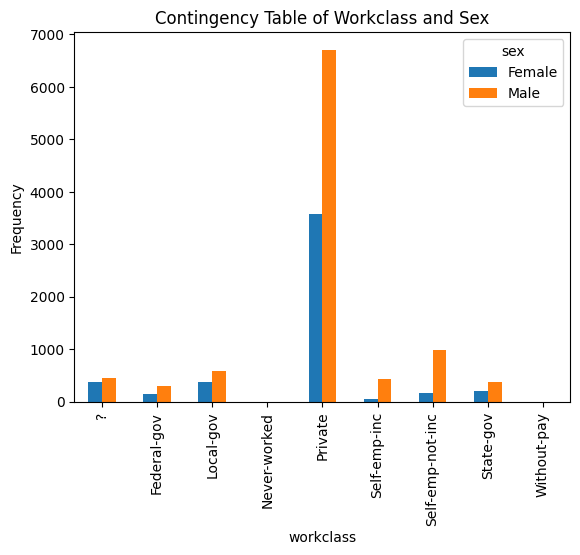

In [78]:
import matplotlib.pyplot as plt

#plot workclass and sex contingency table
workclass_sex_table.plot(kind="bar", stacked=False,
                         title="Contingency Table of Workclass and Sex",
                         xlabel="workclass",
                         ylabel="Frequency")


____________________________________________________________________________________________________
Next, I made a contingency table for working class and sex and plotted it on a barplot. From the results, we can see that a majority of females and males work for private corporations and almost none have never worked or work wihout pay.
____________________________________________________________________________________________________

In [79]:
#create contingency table for sex and marital status
maritalstatus_sex_table = pd.crosstab(data['marital-status'], data['sex'])
maritalstatus_sex_table

sex,Female,Male
marital-status,,
Divorced,1219,795
Married-AF-spouse,7,4
Married-civ-spouse,761,6010
Married-spouse-absent,95,104
Never-married,2160,2717
Separated,290,182
Widowed,380,73


<Axes: title={'center': 'Contingency Table of Marital-Status and Sex'}, xlabel='marital-status', ylabel='Frequency'>

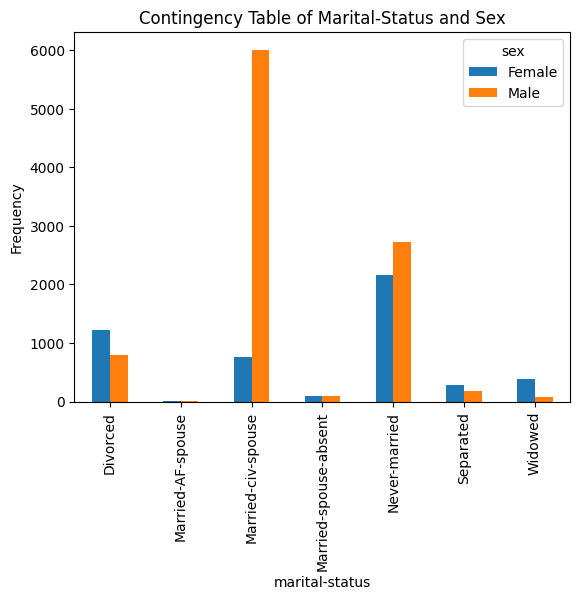

In [80]:
#plot marital-status and sex contingency table
maritalstatus_sex_table.plot(kind="bar", stacked=False,
                             title="Contingency Table of Marital-Status and Sex",
                             xlabel="marital-status",
                             ylabel="Frequency")

____________________________________________________________________________________________________
Then, I made a contingency table for marital status and sex and plotted it on a barplot. From these results, we can see that more males than females are married-civ-spouse, meaning they are married to a civilian spouse. We can also see that more females than males are divorced or widowed.
____________________________________________________________________________________________________

In [81]:
#create new dataframe for adults over 40

adultOver40 = data[data["age"] > 40]


In [82]:
#recreate the contingency table of sex and marital status for adultOver40

over40_maritalstatus_sex_table = pd.crosstab(adultOver40['marital-status'], adultOver40['sex'])

over40_maritalstatus_sex_table

sex,Female,Male
marital-status,,
Divorced,720,448
Married-civ-spouse,305,3383
Married-spouse-absent,38,47
Never-married,256,315
Separated,133,74
Widowed,354,71


<Axes: title={'center': 'Contingency Table of Marital-Status and Sex Over 40'}, xlabel='marital-status', ylabel='Frequency'>

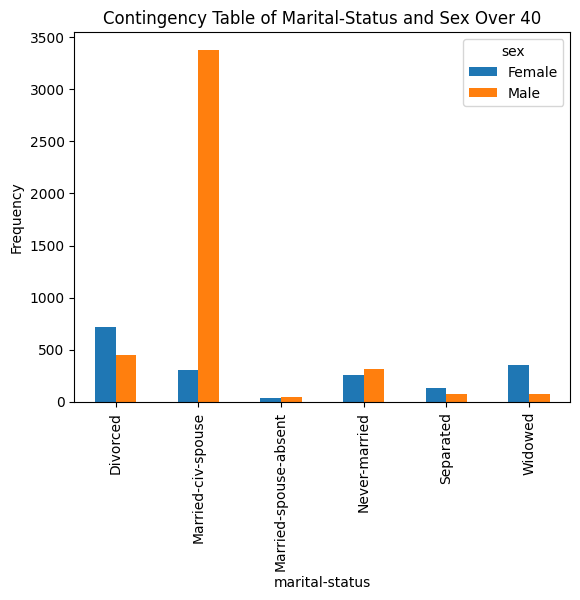

In [83]:
#plot marital-status and sex contingency table
over40_maritalstatus_sex_table.plot(kind="bar", stacked=False,
                             title="Contingency Table of Marital-Status and Sex Over 40",
                             xlabel="marital-status",
                             ylabel="Frequency")

____________________________________________________________________________________________________
Here, we have a contingency table for marital-status and sex, but only looking at adults over 40. There is still a great number of males under married-civ-spouse, however, the results are halved. The marital status that seems to be changed the most when looking at adults over 40 is those who answered never-married. It appears that it is moslty younger people who answered never-married.
____________________________________________________________________________________________________

In [84]:
from scipy import stats

#scale education
data['scaled_education'] = stats.zscore(data.education, nan_policy='omit')

#form 3 sigma rule
education_outliers = data.query('(scaled_education > 3 | scaled_education < -3)')['scaled_education']

#print outliers
print(education_outliers)

72      -3.105523
101     -3.490403
199     -3.105523
243     -3.105523
437     -3.105523
           ...   
14254   -3.105523
14318   -3.105523
14475   -3.105523
14551   -3.490403
14724   -3.105523
Name: scaled_education, Length: 113, dtype: float64


____________________________________________________________________________________________________
From the results of the three sigma rule being applied to education, we can see that there are 113 outliers in the data.
____________________________________________________________________________________________________

In [85]:
#find age outliers
data['scaled_age'] = stats.zscore(data.age, nan_policy='omit')

#form 3 sigma rule
age_outliers = data.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']

#get num of outliers
num_outliers = len(age_outliers)

#find the index of the maximum outlier
max_outlier_index = age_outliers.abs().idxmax()

#get the original age corresponding to the max outlier
max_outlier_age = data['age'].loc[max_outlier_index]

#print outliers
print("There are ", num_outliers, " outliers")
print("Max outlier is ", max_outlier_age)


There are  60  outliers
Max outlier is  90


____________________________________________________________________________________________________
Next, I scaled the age column and used the three sigma rule to determine if there are any outliers in the age data. I found that there are 60 outliers in the age column and the most extreme outlier is the age of 90.
____________________________________________________________________________________________________

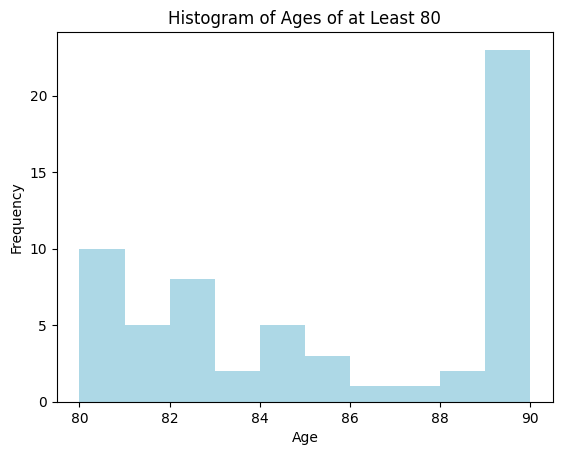

In [86]:
#check for age anomaly

#select ages over 80
age_anomaly = data[data['age'] >= 80]

plt.hist(age_anomaly['age'], color='lightblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages of at Least 80')
plt.show()

____________________________________________________________________________________________________
From this histogram of the age anomalies, we can see that there are many participants who are of the age 89-90.
____________________________________________________________________________________________________



---

**Conclusion** After cleaning the data and removing any 0 or 99999 values, we could see some interesting trends within the data. These include the majority of the males and females working in the private working class and the majorty of males being married to civilians. Additionally, when I reduced the sample to adults over 40, we could see that the number of respondents answering "never married", for both males and females, drastically decreased. As I said previously, this shows that most of the respondents who answered as such were younger. After looking at another subset of the data, we found that of those who were 80 or older, most of the respondents were 89-90. These tests show how much more information you can find about trends and relationships you can find when you look at specific parts of the data, whether it be by column or even seperated by data within the columns.

---

